In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ks_2samp

## Data Cleaning

### Food Access Dataset

In [4]:
df_food = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx', sheet_name = 'Food Access Research Atlas')
df_food

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.713770,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.375235,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.871755,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.604104,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [5]:
df_food.isna().sum()

CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        4
TractOMultir     4
TractHispanic    4
TractHUNV        4
TractSNAP        4
Length: 147, dtype: int64

In [6]:
df_food.isna().sum().sum()

4330227

In [7]:
df_nulls = df_food[df_food.isna().any(axis=1)]

columns_with_nulls = df_nulls.columns[df_nulls.isna().any()].tolist()

In [8]:
columns_with_nulls

['NUMGQTRS',
 'PCTGQTRS',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 'lalowi1',
 'lalowi1share',
 'lakids1',
 'lakids1share',
 'laseniors1',
 'laseniors1share',
 'lawhite1',
 'lawhite1share',
 'lablack1',
 'lablack1share',
 'laasian1',
 'laasian1share',
 'lanhopi1',
 'lanhopi1share',
 'laaian1',
 'laaian1share',
 'laomultir1',
 'laomultir1share',
 'lahisp1',
 'lahisp1share',
 'lahunv1',
 'lahunv1share',
 'lasna

In [9]:
columns_to_impute = [col for col in df_food.columns if 'la' in col[:2] or "LA" in col[:2]]

for col in columns_to_impute[8:]:
    print(df_food[col].isna().sum())

29957
14540
35914
29957
14540
35914
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4562
4568
4562
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19966
19989
19966
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64666
64765
64666
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
70920
71025
70920


In [10]:
df_food['NUMGQTRS'] = df_food['NUMGQTRS'].fillna(-1)
df_food['PCTGQTRS'] = df_food['PCTGQTRS'].fillna(-1)
df_food['PovertyRate'] = df_food['PovertyRate'].fillna(-1)
df_food['MedianFamilyIncome'] = df_food.groupby('County')['MedianFamilyIncome'].transform(lambda x: x.fillna(x.mean()))

### Death by County Dataset 

In [12]:
df_death = pd.read_excel('Underlying Cause of Death, 2018-2023, Single Race.xlsx')
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000"
0,"Autauga County, AL",1001.0,35,55869,62.6
1,"Baldwin County, AL",1003.0,108,223234,48.4
2,"Barbour County, AL",1005.0,11,24686,Unreliable
3,"Blount County, AL",1009.0,18,57826,Unreliable
4,"Butler County, AL",1013.0,24,19448,123.4
...,...,...,...,...,...
1985,"Natrona County, WY",56025.0,39,79858,48.8
1986,"Park County, WY",56029.0,11,29194,Unreliable
1987,"Sheridan County, WY",56033.0,10,30485,Unreliable
1988,"Sweetwater County, WY",56037.0,21,42343,49.6


In [13]:
df_death['State_only'] = df_death['County'].str.split(", ").str[1]
df_death['County_only'] = df_death['County'].str.split(", ").str[0]
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000",State_only,County_only
0,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County
1,"Baldwin County, AL",1003.0,108,223234,48.4,AL,Baldwin County
2,"Barbour County, AL",1005.0,11,24686,Unreliable,AL,Barbour County
3,"Blount County, AL",1009.0,18,57826,Unreliable,AL,Blount County
4,"Butler County, AL",1013.0,24,19448,123.4,AL,Butler County
...,...,...,...,...,...,...,...
1985,"Natrona County, WY",56025.0,39,79858,48.8,WY,Natrona County
1986,"Park County, WY",56029.0,11,29194,Unreliable,WY,Park County
1987,"Sheridan County, WY",56033.0,10,30485,Unreliable,WY,Sheridan County
1988,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County


In [14]:
df_death.isna().sum()

County                    1
County Code               1
Deaths                    0
Population                0
Crude Rate per 100,000    0
State_only                1
County_only               1
dtype: int64

In [15]:
df_death.isna().sum().sum()

4

In [16]:
df_death = df_death.dropna()
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000",State_only,County_only
0,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County
1,"Baldwin County, AL",1003.0,108,223234,48.4,AL,Baldwin County
2,"Barbour County, AL",1005.0,11,24686,Unreliable,AL,Barbour County
3,"Blount County, AL",1009.0,18,57826,Unreliable,AL,Blount County
4,"Butler County, AL",1013.0,24,19448,123.4,AL,Butler County
...,...,...,...,...,...,...,...
1984,"Laramie County, WY",56021.0,51,99500,51.3,WY,Laramie County
1985,"Natrona County, WY",56025.0,39,79858,48.8,WY,Natrona County
1986,"Park County, WY",56029.0,11,29194,Unreliable,WY,Park County
1987,"Sheridan County, WY",56033.0,10,30485,Unreliable,WY,Sheridan County


In [17]:
df_death.dtypes

County                     object
County Code               float64
Deaths                      int64
Population                  int64
Crude Rate per 100,000     object
State_only                 object
County_only                object
dtype: object

In [18]:
df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].apply(lambda x: 0.00 if x == 'Unreliable' else x)
df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].astype('float')

/var/folders/8s/lsswl7l17fbdmk71xlqplb840000gn/T/ipykernel_10420/2707181817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].apply(lambda x: 0.00 if x == 'Unreliable' else x)
/var/folders/8s/lsswl7l17fbdmk71xlqplb840000gn/T/ipykernel_10420/2707181817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].astype('float')


In [19]:
df_death['State_only'] = df_death['State_only'].astype('category')

/var/folders/8s/lsswl7l17fbdmk71xlqplb840000gn/T/ipykernel_10420/3469385370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['State_only'] = df_death['State_only'].astype('category')


### Merging Datasets

In [21]:
df_merged = df_death.merge(df_food, how = 'inner', left_on = 'County_only', right_on = 'County')
df_merged

,County_x,County Code,Deaths,Population,"Crude Rate per 100,000",State_only,County_only,CensusTract,State,County_y,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020100,Alabama,Autauga County,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020200,Alabama,Autauga County,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020300,Alabama,Autauga County,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020400,Alabama,Autauga County,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020500,Alabama,Autauga County,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223680,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037970903,Wyoming,Sweetwater County,...,136.0,2306.0,84.0,29.0,8.0,22.0,392.0,611.0,17.0,127.0
223681,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037971000,Wyoming,Sweetwater County,...,204.0,1866.0,13.0,11.0,0.0,20.0,254.0,436.0,11.0,39.0
223682,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037971100,Wyoming,Sweetwater County,...,497.0,2969.0,27.0,36.0,5.0,22.0,262.0,420.0,8.0,47.0
223683,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037971200,Wyoming,Sweetwater County,...,405.0,2350.0,20.0,20.0,1.0,20.0,113.0,234.0,0.0,8.0


## EDA

### Ellie EDA

In [24]:
df_merged.columns.to_list()
df_merged['LILATracts_1And10'].unique()
df_merged['mortality_rate'] = df_merged['Deaths'] / df_merged['Population'] * 100000

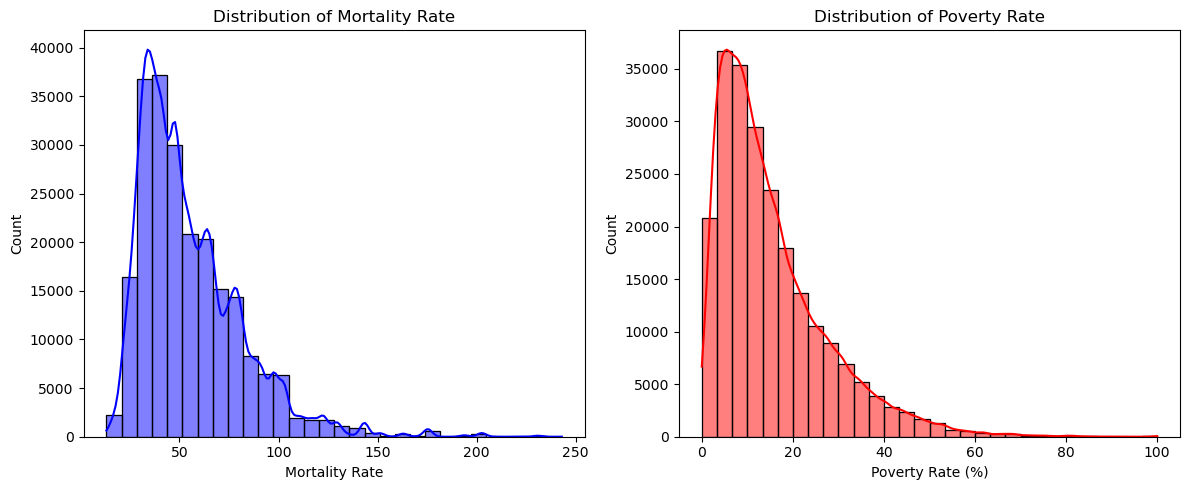

In [25]:
plt.figure(figsize=(12, 5))

# mortality rate
plt.subplot(1, 2, 1)
sns.histplot(df_merged['mortality_rate'], bins=30, kde=True, color="blue")
plt.xlabel("Mortality Rate")
plt.ylabel("Count")
plt.title("Distribution of Mortality Rate")

# poverty rate
plt.subplot(1, 2, 2)
sns.histplot(df_merged['PovertyRate'], bins=30, kde=True, color="red")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Count")
plt.title("Distribution of Poverty Rate")

plt.tight_layout()
plt.show()

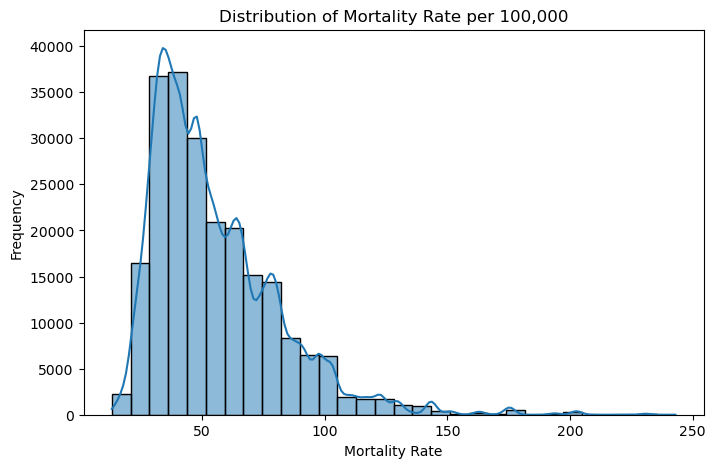

In [26]:
df_merged['mortality_rate'] = df_merged['Deaths'] / df_merged['Population'] * 100000

plt.figure(figsize=(8, 5))
sns.histplot(df_merged['mortality_rate'], bins=30, kde=True)
plt.title("Distribution of Mortality Rate per 100,000")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")
plt.show()

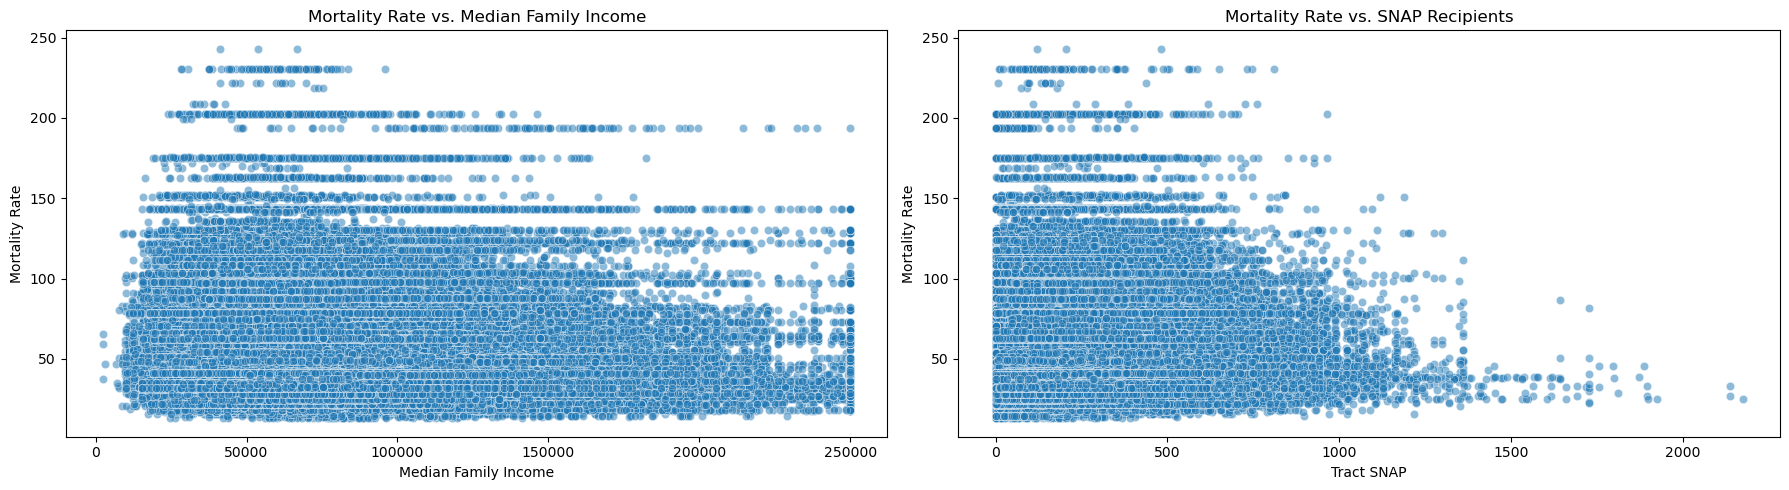

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# mortality vs. median family income
sns.scatterplot(x=df_merged['MedianFamilyIncome'], y=df_merged['mortality_rate'], ax=axes[0], alpha=0.5)
axes[0].set_title("Mortality Rate vs. Median Family Income")
axes[0].set_xlabel("Median Family Income")
axes[0].set_ylabel("Mortality Rate")

# mortality rate vs. SNAP recipients
sns.scatterplot(x=df_merged['TractSNAP'], y=df_merged['mortality_rate'], ax=axes[1], alpha=0.5)
axes[1].set_title("Mortality Rate vs. SNAP Recipients")
axes[1].set_xlabel("Tract SNAP")
axes[1].set_ylabel("Mortality Rate")

plt.tight_layout()
plt.show()


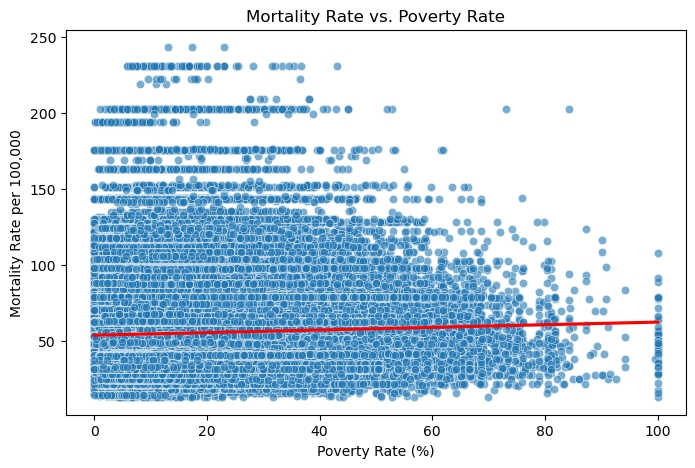

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_merged['PovertyRate'], y=df_merged['mortality_rate'], alpha=0.6)
sns.regplot(x=df_merged['PovertyRate'], y=df_merged['mortality_rate'], scatter=False, color='red')
plt.title("Mortality Rate vs. Poverty Rate")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Mortality Rate per 100,000")
plt.show()

There is a weak positive correlation between poverty rate and mortality rate, meaning that counties with higher poverty rates may have slightly higher mortality, but other factors likely play a more significant role.

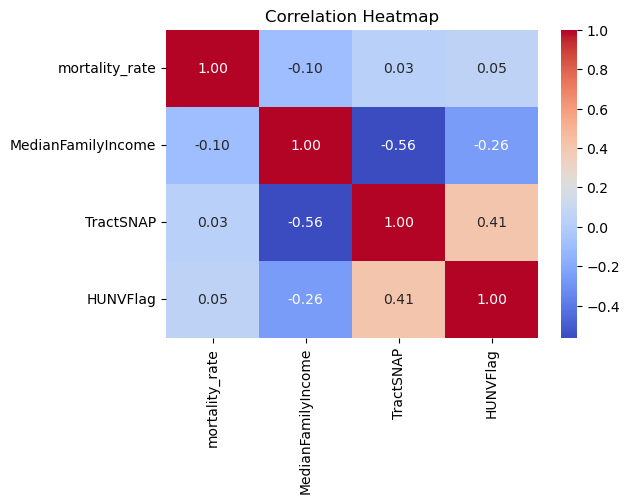

In [30]:
corr_vars = ['mortality_rate', 'MedianFamilyIncome', 'TractSNAP', 'HUNVFlag']
corr_matrix = df_merged[corr_vars].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

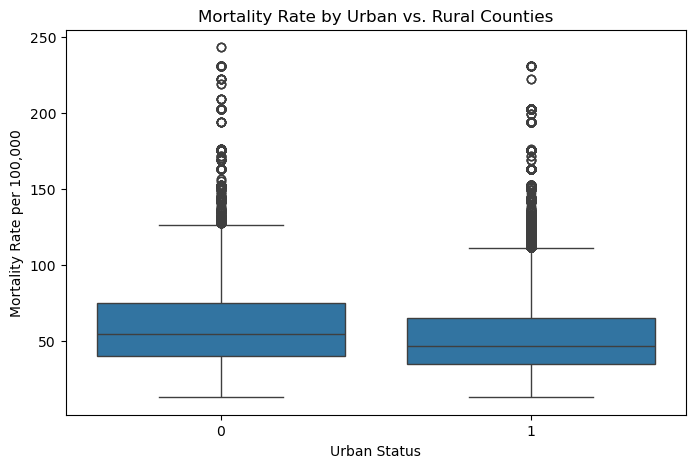

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_merged['Urban'], y=df_merged['mortality_rate'])
plt.title("Mortality Rate by Urban vs. Rural Counties")
plt.xlabel("Urban Status")
plt.ylabel("Mortality Rate per 100,000")
plt.show()

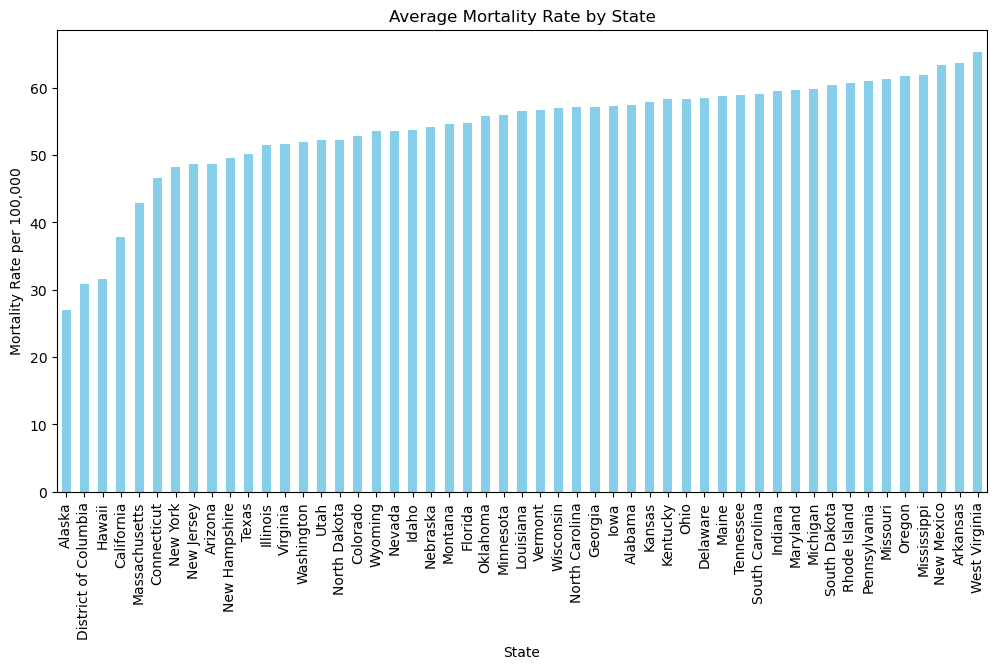

In [32]:
plt.figure(figsize=(12, 6))
state_avg = df_merged.groupby('State')['mortality_rate'].mean().sort_values()
state_avg.plot(kind='bar', color='skyblue')
plt.title("Average Mortality Rate by State")
plt.xlabel("State")
plt.ylabel("Mortality Rate per 100,000")
plt.xticks(rotation=90)
plt.show()

/var/folders/8s/lsswl7l17fbdmk71xlqplb840000gn/T/ipykernel_10420/823639383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_merged['food_desert'], y=df_merged['mortality_rate'], palette=["red", "blue"])


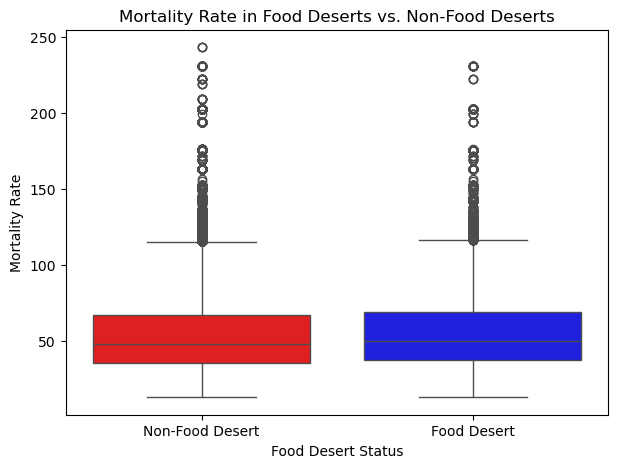

                count       mean        std        min        25%        50%  \
food_desert                                                                    
False        158254.0  54.772231  26.208671  13.107992  35.320922  47.857298   
True          65431.0  56.134408  25.474635  13.107992  37.324037  49.776008   

                   75%         max  
food_desert                         
False        67.362233  243.051886  
True         68.933344  230.786984  


In [33]:
df_merged['food_desert'] = (df_merged['LILATracts_1And10'] > 0) | (df_merged['LILATracts_halfAnd10'] > 0)

plt.figure(figsize=(7, 5))
sns.boxplot(x=df_merged['food_desert'], y=df_merged['mortality_rate'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Non-Food Desert", "Food Desert"])
plt.xlabel("Food Desert Status")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate in Food Deserts vs. Non-Food Deserts")
plt.show()

print(df_merged.groupby("food_desert")["mortality_rate"].describe())

/var/folders/8s/lsswl7l17fbdmk71xlqplb840000gn/T/ipykernel_10420/3439005674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_merged['general_food_desert'], y=df_merged['mortality_rate'], palette=["red", "blue"])


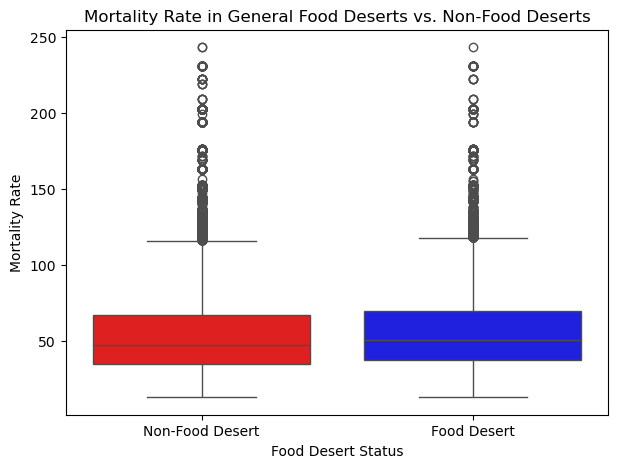

                        count       mean        std        min        25%  \
general_food_desert                                                         
False                153137.0  54.491936  26.107366  13.107992  35.050824   
True                  70548.0  56.644037  25.714974  13.107992  37.456658   

                           50%        75%         max  
general_food_desert                                    
False                47.741692  67.341075  243.051886  
True                 50.508052  69.619568  243.051886  


In [34]:
df_merged['general_food_desert'] = (
    (df_merged['LILATracts_1And10'] > 0) | 
    (df_merged['LILATracts_halfAnd10'] > 0) | 
    (df_merged['LILATracts_1And20'] > 0) | 
    (df_merged['LILATracts_Vehicle'] > 0)
)
plt.figure(figsize=(7, 5))
sns.boxplot(x=df_merged['general_food_desert'], y=df_merged['mortality_rate'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Non-Food Desert", "Food Desert"])
plt.xlabel("Food Desert Status")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate in General Food Deserts vs. Non-Food Deserts")
plt.show()

print(df_merged.groupby("general_food_desert")["mortality_rate"].describe())


### Adam EDA

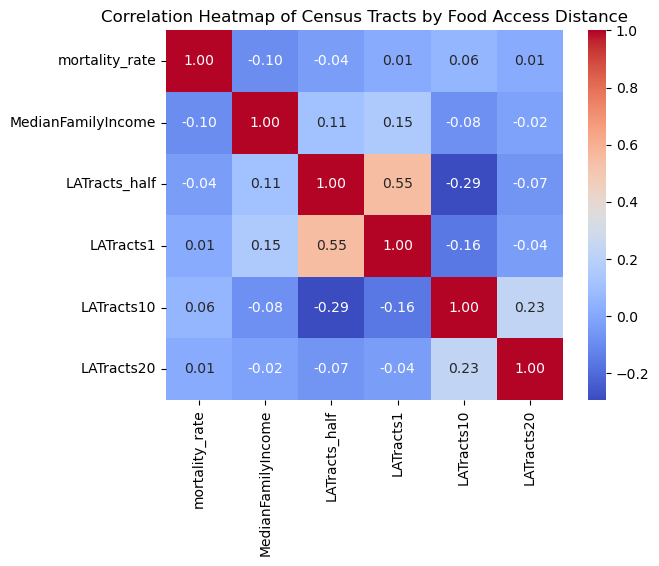

In [36]:
relevant_columns = ['mortality_rate', 'MedianFamilyIncome',
                     'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20']
sns.heatmap(df_merged[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Census Tracts by Food Access Distance")
plt.show()

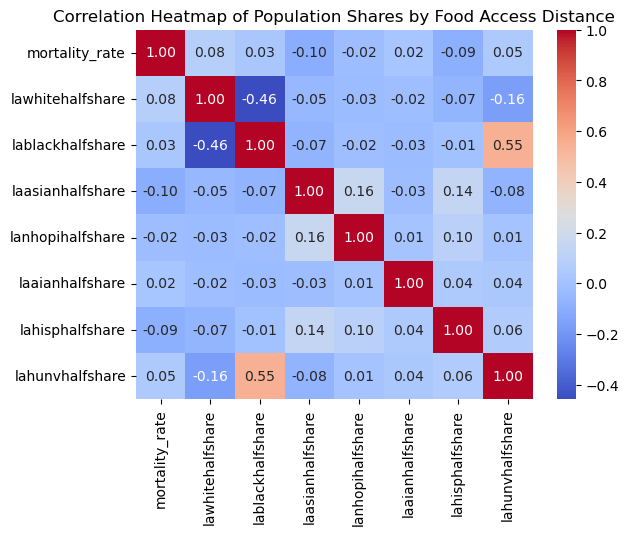

In [37]:
relevant_columns = ['mortality_rate', 'lawhitehalfshare', 'lablackhalfshare',
                    'laasianhalfshare', 'lanhopihalfshare', 'laaianhalfshare',
                    'lahisphalfshare', 'lahunvhalfshare']
sns.heatmap(df_merged[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Population Shares by Food Access Distance")
plt.show()

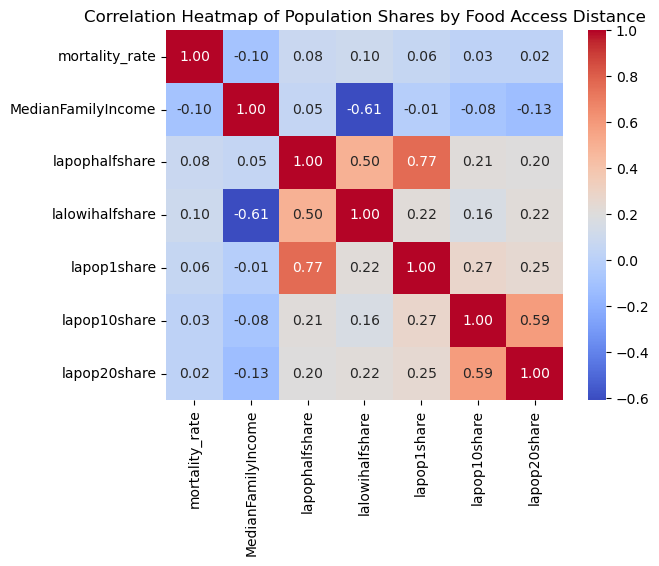

In [38]:
relevant_columns = ['mortality_rate', 'MedianFamilyIncome',
                     'lapophalfshare', 'lalowihalfshare', 'lapop1share', 'lapop10share', 'lapop20share']
sns.heatmap(df_merged[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Population Shares by Food Access Distance")
plt.show()

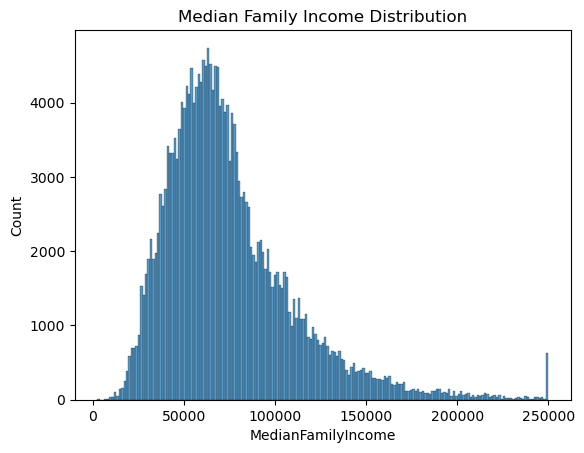

In [39]:
sns.histplot(df_merged['MedianFamilyIncome'])
plt.title('Median Family Income Distribution')
plt.show()

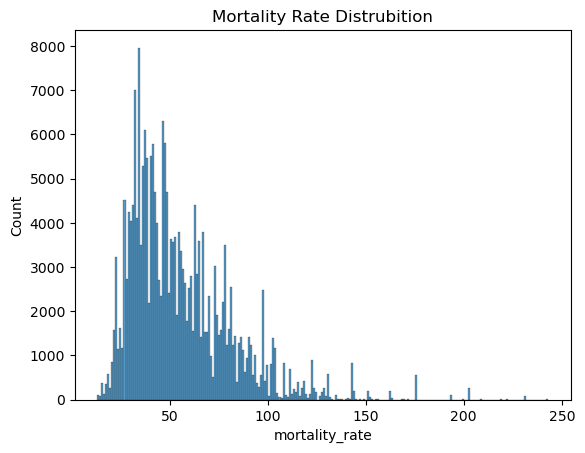

In [40]:
sns.histplot(df_merged['mortality_rate'])
plt.title('Mortality Rate Distrubition')
plt.show()

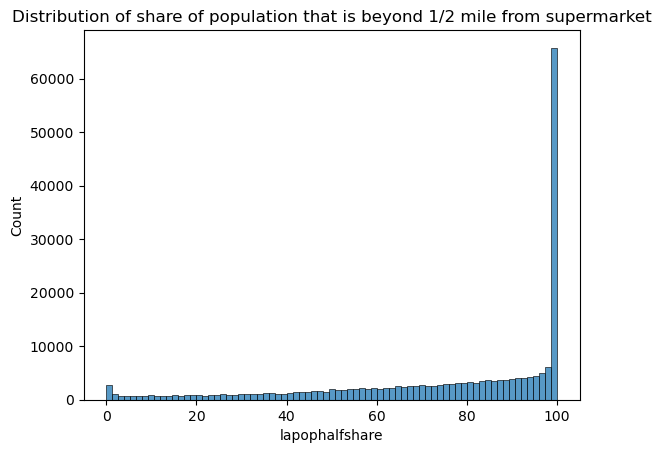

In [41]:
sns.histplot(df_merged['lapophalfshare'])
plt.title('Distribution of share of population that is beyond 1/2 mile from supermarket')
plt.show()

In [42]:
df_merged['lapophalfshare'].value_counts().sort_values(ascending=False)

lapophalfshare
0.000000      689
88.096099      24
67.565252      24
100.000000     24
100.000000     24
             ... 
20.145446       1
79.054832       1
77.315257       1
74.375149       1
100.000000      1
Name: count, Length: 65501, dtype: int64

In [43]:
df_clean = df_merged.dropna(subset=['mortality_rate', 'lapophalfshare'])

# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_clean['mortality_rate'], df_clean['lapophalfshare'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05  # Common significance level (5%)
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")


Pearson Correlation: 0.08042788458658043
P-value: 9.968464012305619e-307
The correlation is statistically significant.


In [44]:
df_clean = df_merged.dropna(subset=['mortality_rate', 'MedianFamilyIncome'])

# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_clean['mortality_rate'], df_clean['MedianFamilyIncome'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05  # Common significance level (5%)
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")

Pearson Correlation: -0.09505001184636194
P-value: 0.0
The correlation is statistically significant.


## Hypothesis Testing

### Attempt at t-test (check for normal distribution and equal variance)

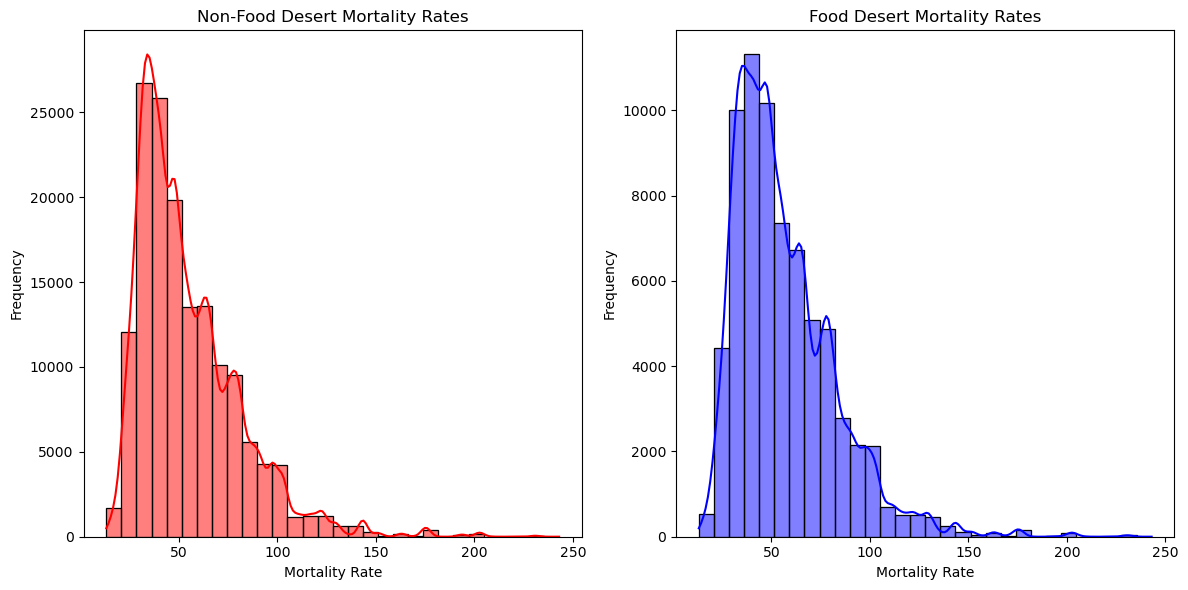

In [47]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_merged[df_merged['general_food_desert'] == 0]['mortality_rate'], bins=30, kde=True, color='red')
plt.title("Non-Food Desert Mortality Rates")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df_merged[df_merged['general_food_desert'] == 1]['mortality_rate'], bins=30, kde=True, color='blue')
plt.title("Food Desert Mortality Rates")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### QQ plots of non food deserts and food deserts 

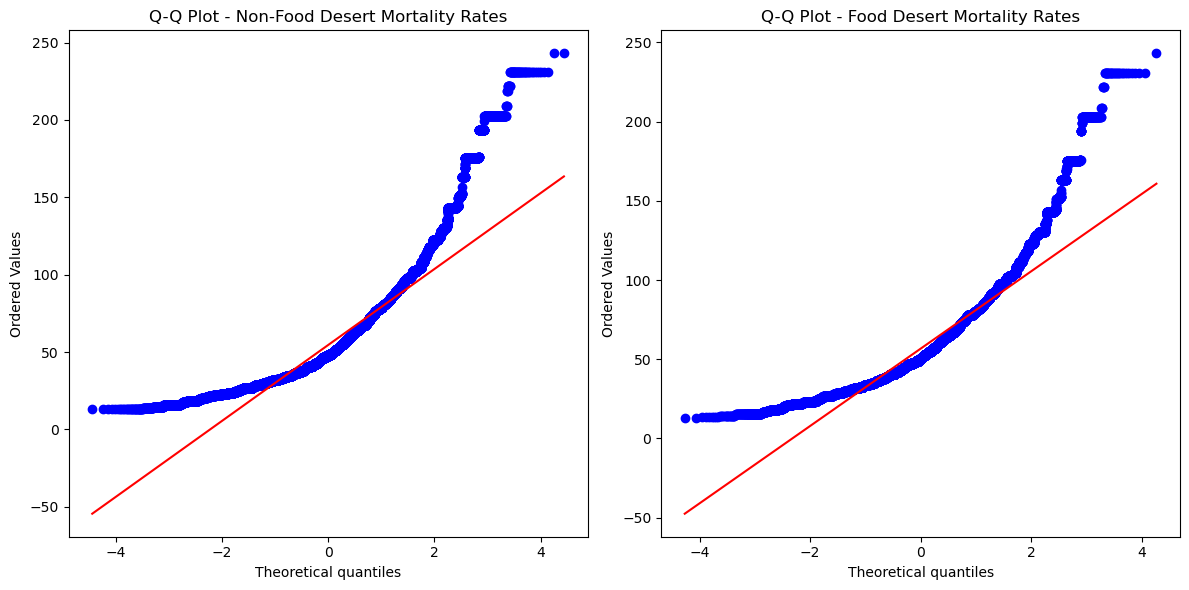

In [49]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df_merged[df_merged['general_food_desert'] == 0]['mortality_rate'], dist="norm", plot=plt)
plt.title("Q-Q Plot - Non-Food Desert Mortality Rates")

plt.subplot(1, 2, 2)
stats.probplot(df_merged[df_merged['general_food_desert'] == 1]['mortality_rate'], dist="norm", plot=plt)
plt.title("Q-Q Plot - Food Desert Mortality Rates")

plt.tight_layout()
plt.show()

### Kolmogorov-Smirnov (KS) test

In [51]:
food_desert_group = df_merged[df_merged['food_desert'] == 1]['mortality_rate']
non_food_desert_group = df_merged[df_merged['food_desert'] == 0]['mortality_rate']

statistic, p_value = ks_2samp(food_desert_group, non_food_desert_group)

print(f"KS Test statistic: {statistic}, p-value: {p_value}")

KS Test statistic: 0.05343058691743113, p-value: 2.6558213945953793e-115


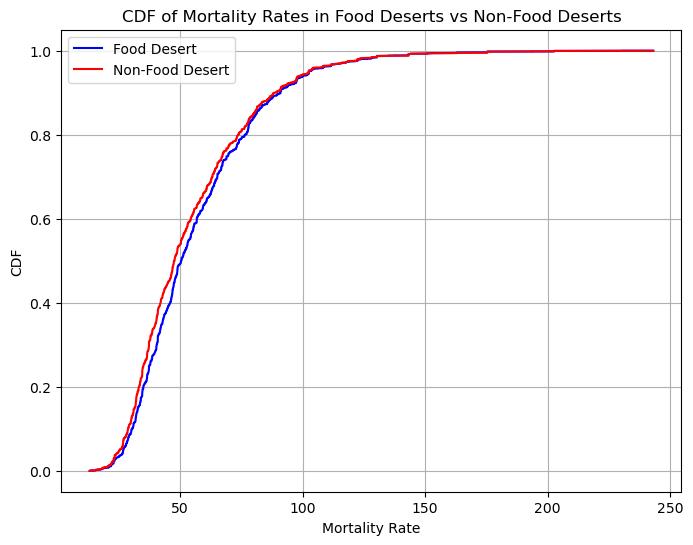

In [52]:
food_desert_group = df_merged[df_merged['general_food_desert'] == 1]['mortality_rate']
non_food_desert_group = df_merged[df_merged['general_food_desert'] == 0]['mortality_rate']

food_desert_sorted = np.sort(food_desert_group)
non_food_desert_sorted = np.sort(non_food_desert_group)

food_desert_cdf = np.arange(1, len(food_desert_sorted)+1) / len(food_desert_sorted)
non_food_desert_cdf = np.arange(1, len(non_food_desert_sorted)+1) / len(non_food_desert_sorted)

plt.figure(figsize=(8, 6))
plt.plot(food_desert_sorted, food_desert_cdf, label='Food Desert', color='blue')
plt.plot(non_food_desert_sorted, non_food_desert_cdf, label='Non-Food Desert', color='red')
plt.xlabel('Mortality Rate')
plt.ylabel('CDF')
plt.title('CDF of Mortality Rates in Food Deserts vs Non-Food Deserts')
plt.legend()
plt.grid(True)
plt.show()

### Permutation Test

In [54]:
food_desert_group = df_merged[df_merged['general_food_desert'] == True]['mortality_rate']
non_food_desert_group = df_merged[df_merged['general_food_desert'] == False]['mortality_rate']

combined_mortality_rate = np.concatenate([food_desert_group.values, non_food_desert_group.values])
labels = np.concatenate([np.ones(len(food_desert_group)), np.zeros(len(non_food_desert_group))])
combined_df = pd.DataFrame({'mortality_rate': combined_mortality_rate, 'is_food_desert': labels})
combined_df.head()

,mortality_rate,is_food_desert
0,62.646548,1.0
1,62.646548,1.0
2,62.646548,1.0
3,62.646548,1.0
4,62.646548,1.0


In [55]:
food_desert_group = combined_df[combined_df['is_food_desert'] == 1]['mortality_rate']
non_food_desert_group = combined_df[combined_df['is_food_desert'] == 0]['mortality_rate']

observed_diff = food_desert_group.mean() - non_food_desert_group.mean()
combined_data = np.concatenate([food_desert_group, non_food_desert_group])
n_permutations = 10000
permuted_diffs = []

for _ in range(n_permutations):
    permuted_data = np.random.permutation(combined_data) 
    perm_food_desert = permuted_data[:len(food_desert_group)]  
    perm_non_food_desert = permuted_data[len(food_desert_group):]
    perm_diff = perm_food_desert.mean() - perm_non_food_desert.mean()
    permuted_diffs.append(perm_diff)
permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f"Observed difference in means: {observed_diff}")
print(f"Permutation test p-value: {p_value}")

Observed difference in means: 2.1521009731354823
Permutation test p-value: 0.0


In [56]:
ks_statistic, ks_p_value = ks_2samp(food_desert_group, non_food_desert_group)

print(f"KS Test statistic: {ks_statistic}")
print(f"KS Test p-value: {ks_p_value}")

KS Test statistic: 0.06579685155993659
KS Test p-value: 3.103426310802958e-182


### Wald-Wolfowitz Runs Test

In [58]:
food_desert_group = combined_df[combined_df['is_food_desert'] == 1]['mortality_rate']
non_food_desert_group = combined_df[combined_df['is_food_desert'] == 0]['mortality_rate']

combined_data = np.concatenate([food_desert_group.values, non_food_desert_group.values])
labels = np.concatenate([np.ones(len(food_desert_group)), np.zeros(len(non_food_desert_group))])

sorted_data_with_labels = list(zip(combined_data, labels))
sorted_data_with_labels.sort(key=lambda x: x[0])

runs = 1
for i in range(1, len(sorted_data_with_labels)):
    if sorted_data_with_labels[i][1] != sorted_data_with_labels[i-1][1]:
        runs += 1

n1 = len(food_desert_group)
n2 = len(non_food_desert_group)
expected_runs = (2 * n1 * n2) / (n1 + n2) + 1

variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2)**2 * (n1 + n2 - 1))

z = (runs - expected_runs) / np.sqrt(variance_runs)

p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected_runs}")
print(f"Variance of runs: {variance_runs}")
print(f"Z-statistic: {z}")
print(f"P-value: {p_value}")

Observed number of runs: 3782
Expected number of runs: 96596.74022397568
Variance of runs: 41713.49061031442
Z-statistic: -454.44223468174476
P-value: 0.0


With a consistent p-value of 0, we reject our null hypothesis. The difference in mortality rates between food desert and non-food desert areas is statistically significant. 

## Regression Modeling

We want to take a deeper look into the key risk factors that contribute to the highest county-wide mortality rates in our data. To accomplish this, we can contruct a regression model with an optimal set of variables to predict the mortality rate. This model can potentially give us insight on what populations suffer the most from food deserts and how to focus public health efforts to reduce food insecurity among US counties.

In [62]:
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Interested Variables

There are over 150 variables associated with each county in our merged dataset, so we need to cut down and focus just on the variables we are most interested in. We identified the following 15 variables to include in our model, based on their description and correlation matrix defined above in the exploratory data analysis section. Intuitively, these variables can shed valuable insight on the nutritional and metabolic mortality rate in these US counties. The variables are described as follows:

1. 'MedianFamilyIncome' \[discrete quantitative]: The median family income of the county
2. 'lapophalfshare' \[continuous quantitative]: Share of county population that are beyond 1/2 mile from supermarket
3. 'lalowihalfshare' \[continuous quantitative]: Share of county population that are low income individual beyond 1/2 mile from supermarket
4. 'lapop1share' \[continuous quantitative]: Share of county population that are beyond 1 mile from supermarket
5. 'lapop10share' \[continuous quantitative]: Share of county population that are beyond 10 miles from supermarket
6. 'lapop20share' \[continuous quantitative]: Share of county population that are beyond 20 miles from supermarket
7. 'PovertyRate' \[continuous quantitative]: Share of county population living with income at or below the Federal poverty thresholds for family size
8. 'HUNVFlag' \[categorical]: Flag for county where >= 100 of households do not have a vehicle, and beyond 1/2 mile from supermarket
9. 'lawhitehalfshare' \[continuous quantitative]: Share of county population that are white beyond 1/2 mile from supermarket
10. 'lablackhalfshare' \[continuous quantitative]: Share of county population that are Black or African American beyond 1/2 mile from supermarket
11. 'laasianhalfshare' \[continuous quantitative]: Share of county population that are Asian beyond 1/2 mile from supermarket
12. 'lanhopihalfshare' \[continuous quantitative]: Share of county population that are Native Hawaiian or Other Pacific Islander beyond 1/2 mile from supermarket
13. 'laaianhalfshare' \[continuous quantitative]: Share of county population that are American Indian or Alaska Native beyond 1/2 mile from supermarket
14. 'lahisphalfshare' \[continuous quantitative]: Share of county population that are of Hispanic or Latino ethnicity beyond 1/2 mile from supermarket
15. 'lahunvhalfshare' \[continuous quantitative]: Share of county housing units that are without vehicle and beyond 1/2 mile from supermarket

The response variable 'mortality_rate' is a continuous quantitative data type, which is the crude mortality rate due to nutritional and metabolic diseases per 100,000 in a given US county.

As shown, many of these variables are "shares", which indicate the percentage of the county population that meet the given criteria. The only categorical variable is 'HUNVFlag', which is a binary variable with '1' representing the counties that have over 100 households without a vehicle and beyond 1/2 mile from the closest supermarket, and '0' representing those that do not.

In [143]:
interested_variables = [
    'MedianFamilyIncome', 'lapophalfshare', 'lalowihalfshare', 
    'lapop1share', 'lapop10share', 'lapop20share',
    'PovertyRate', 'HUNVFlag', 'lawhitehalfshare', 'lablackhalfshare',
    'laasianhalfshare', 'lanhopihalfshare', 'laaianhalfshare',
    'lahisphalfshare', 'lahunvhalfshare'
]

In [65]:
df_merged.loc[:, interested_variables]

,MedianFamilyIncome,lapophalfshare,lalowihalfshare,lapop1share,lapop10share,lapop20share,TractSNAP,HUNVFlag,lawhitehalfshare,lablackhalfshare,laasianhalfshare,lanhopihalfshare,laaianhalfshare,lahisphalfshare,lahunvhalfshare
0,81250.0,100.000000,24.423234,99.188982,NaN,NaN,102.0,0,84.832636,11.349372,0.732218,0.000000,0.732218,2.301255,0.792272
1,49000.0,100.000000,44.340989,58.110214,NaN,NaN,156.0,0,40.921659,56.082949,0.230415,0.000000,0.230415,3.456221,12.472887
2,62609.0,84.697873,28.790764,46.003674,NaN,NaN,172.0,0,64.529803,16.431533,0.304419,0.029647,0.303667,2.300992,3.086528
3,70607.0,83.243525,20.364831,31.086796,NaN,NaN,98.0,0,77.406793,3.877461,0.339142,0.060155,0.183160,1.400770,1.127900
4,96334.0,72.249639,15.965868,24.550392,NaN,NaN,339.0,1,58.505576,9.294803,1.941137,0.048268,0.352908,2.572121,4.014997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223680,82955.0,57.097849,14.966069,37.098231,NaN,NaN,127.0,0,48.414417,1.688271,0.470314,0.202574,0.316825,9.977040,0.649548
223681,84125.0,74.272910,20.653954,10.572300,0.000000,NaN,39.0,0,63.853768,0.431733,0.495790,0.000000,0.649373,15.093098,0.962762
223682,88882.0,100.000001,30.634113,69.654431,NaN,NaN,47.0,0,89.400783,0.813008,1.084011,0.150557,0.662451,12.646793,0.541237
223683,106339.0,100.000000,15.160128,99.953529,NaN,NaN,8.0,0,93.106180,0.792393,0.792393,0.039620,0.792393,9.270998,0.000000


### Split Data

To test the performance of our model, we can set up a train/test/split process and divide our data into the training set (80%) and test set (20%). Ultimately, the model will be evaluated on data it has not seen before, providing a performance metric on its ability to generalize to new data.

In [67]:
# Split Data
X = df_merged[interested_variables]
X = X.copy()

y = df_merged['mortality_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipeline

In [69]:
# Define preprocessing for numerical features
num_impute_median = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Median imputation
    ('scaler', StandardScaler())
])

num_impute_mean = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mean imputation
    ('scaler', StandardScaler())
])

num_impute_neg = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('scaler', StandardScaler())
])

# Define the preprocessor for categorical features (one-hot)
cat_preprocessor = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

In [145]:
# Apply transformations using ColumnTransformer
preprocessor = ColumnTransformer([
    ('hot_encode', cat_preprocessor, ['HUNVFlag']),
    ('avg_imp_stand', num_impute_mean, ['MedianFamilyIncome', 'lapophalfshare', 'lalowihalfshare', 
    'lapop1share', 'lapop10share', 'lapop20share',
    'PovertyRate', 'lawhitehalfshare', 'lablackhalfshare',
    'laasianhalfshare', 'lanhopihalfshare', 'laaianhalfshare',
    'lahisphalfshare', 'lahunvhalfshare'])
])

### Model

In [72]:
# Apply preprocessing to train and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert the transformed data back to DataFrame for statsmodels
# For categorical features, get the one-hot encoded feature names
cat_feature_names = preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(input_features=['HUNVFlag'])

# Combine feature names for numerical and categorical features
feature_names = list(cat_feature_names) + ['MedianFamilyIncome', 'lapophalfshare', 'lalowihalfshare', 
                                            'lapop1share', 'lapop10share', 'lapop20share', 'PovertyRate', 
                                            'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare', 
                                            'lanhopihalfshare', 'laaianhalfshare', 'lahisphalfshare', 'lahunvhalfshare']

# Convert to DataFrame with proper column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)


In [73]:
# Step 2: Perform OLS regression with statsmodels formula API (use DataFrame for formula)
train_data = X_train_transformed_df.copy()
train_data['mortality_rate'] = y_train

# Fit the initial OLS model with all features
formula = 'mortality_rate ~ ' + ' + '.join(feature_names)

In [74]:
# Fit the final model with the selected features
final_formula = formula
final_model = smf.ols(final_formula, train_data).fit()

# Check the summary of the model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:         mortality_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9024
Date:                Wed, 12 Mar 2025   Prob (F-statistic):              0.566
Time:                        23:57:13   Log-Likelihood:            -6.7129e+05
No. Observations:              143262   AIC:                         1.343e+06
Df Residuals:                  143245   BIC:                         1.343e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.086e+10   1.97

In [75]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):
    """
    Identify the worst column to remove based on the given criterion.
    REMEMBER: The smaller the criterion, the better the model.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    already_selected_columns (set): The set of currently selected columns.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    tuple: The worst column to remove and its criterion value.
    """

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for column in already_selected_columns:
        new_columns = already_selected_columns - {column}

        # Avoid formula errors if no columns are left
        if len(new_columns) == 0:
            continue

        formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = column
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):
    """
    Perform backward selection to find the optimal model based on the given criterion.
    REMEMBER: The smallest criterion value is considered the best model fit.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    set: The set of selected columns in the optimal model.
    """

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    if len(already_selected_columns) == 0:
        raise ValueError("No predictor variables left in the model")
    best_criterion = criterion(f'{response} ~ {' + '.join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential_column, current_criterion = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current_criterion <= best_criterion:
            already_selected_columns.remove(potential_column)
            best_criterion = current_criterion
            print(f'Criterion: {best_criterion}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

In [76]:
backward_vars = backward(train_data, criterion, response='mortality_rate')
backward_vars

Criterion: 1342776.9570919455
Criterion: 1342765.0848280168
Criterion: 1342753.213395892
Criterion: 1342741.5670449433
Criterion: 1342730.023576595
Criterion: 1342718.561547984
Criterion: 1342707.098595375
Criterion: 1342695.4338972217
Criterion: 1342684.0670286233
Criterion: 1342673.3574492193
Criterion: 1342663.182558103
Criterion: 1342652.4550435378
Criterion: 1342641.5771896082
Criterion: 1342631.7301845588
Criterion: 1342623.1180567248


{'HUNVFlag_1'}

In [77]:
# Fit the final model with the selected features
final_formula = f'mortality_rate ~ HUNVFlag_0'
final_model = smf.ols(final_formula, train_data).fit()

# Check the summary of the model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:         mortality_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.165
Date:                Wed, 12 Mar 2025   Prob (F-statistic):              0.141
Time:                        23:57:29   Log-Likelihood:            -6.7130e+05
No. Observations:              143262   AIC:                         1.343e+06
Df Residuals:                  143260   BIC:                         1.343e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2058      0.142    387.845      0.0

In [78]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('model', LinearRegression())  # Apply OLS regression
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('hot_encode',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HUNVFlag']),
                                                 ('avg_imp_stand',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MedianFamilyIncome',
                                                   'lapophalfshare',
                                                   'lalowihalfshare',
                                                   'lapop1share',
                                                   'lapop10share',
                                                   'lapop20share', 'TractSNAP',
                                                   'lawhitehalfshare',
                                                   'lablackhalfshare',
                                                   'laasianhalfshare',
                                                   'lanhopihalfshare',
                                                   'laaianhalfshare',
                                                   'lahisphalfshare',
                                                   'lahunvhalfshare'])])),
                ('model', LinearRegression())])

### Evaluate Model

In [80]:
# Step 6: Make predictions on both training and test sets
train_predictions = model_pipeline.predict(X_train)
test_predictions = model_pipeline.predict(X_test)

# Step 7: Calculate RMSE for both training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 25.576610012169542
Test RMSE: 25.391752118958497


In [81]:
# Get model coefficients (interpreted as feature importance)
coefficients = model_pipeline.named_steps['model'].coef_

# Get feature names from the ColumnTransformer after fitting
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame with feature importance (coefficients)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature    Importance
1              hot_encode__HUNVFlag_1  4.397103e+10
0              hot_encode__HUNVFlag_0  4.397103e+10
9     avg_imp_stand__lawhitehalfshare  4.270161e+00
10    avg_imp_stand__lablackhalfshare  1.514167e+00
4      avg_imp_stand__lalowihalfshare  1.477145e+00
13     avg_imp_stand__laaianhalfshare  5.225812e-01
6         avg_imp_stand__lapop10share  1.245194e-01
7         avg_imp_stand__lapop20share  3.079466e-02
12    avg_imp_stand__lanhopihalfshare -1.304913e-01
5          avg_imp_stand__lapop1share -4.444679e-01
8            avg_imp_stand__TractSNAP -5.404448e-01
15     avg_imp_stand__lahunvhalfshare -7.009070e-01
11    avg_imp_stand__laasianhalfshare -8.928751e-01
3       avg_imp_stand__lapophalfshare -1.605784e+00
2   avg_imp_stand__MedianFamilyIncome -2.294014e+00
14     avg_imp_stand__lahisphalfshare -2.436733e+00
